In [1]:
import pandas as pd

Importing esports data...

In [2]:
esport = pd.read_csv("https://www.andybek.com/pandas-games")

Let's get more information about the data we have.

In [3]:
esport.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
1,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
2,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
4,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64


In [4]:
esport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          3143 non-null   object 
 1   Platform      3143 non-null   object 
 2   Year          3088 non-null   float64
 3   Genre         3143 non-null   object 
 4   Publisher     3136 non-null   object 
 5   NA_Sales      3143 non-null   float64
 6   EU_Sales      3143 non-null   float64
 7   JP_Sales      3143 non-null   float64
 8   Other_Sales   3143 non-null   float64
 9   Global_Sales  3143 non-null   float64
dtypes: float64(6), object(4)
memory usage: 245.7+ KB


The dataset has a total of 10 columns and 3142 rows.

We will use the above data to create a bar chart that shows the top 5 highest selling ps3 games in the world.

<AxesSubplot:ylabel='Name'>

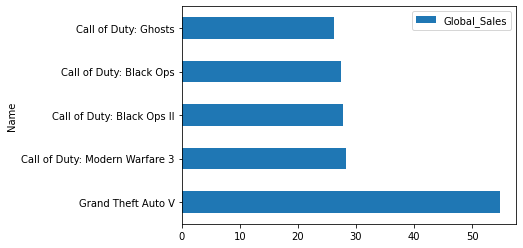

In [5]:
esport.groupby("Name").agg(sum).sort_values(by="Global_Sales", ascending=False).nlargest(5, "Global_Sales").loc[:,["Global_Sales"]].plot(kind="barh")

From the above figure we can see that GTA V is the most sold game globally.

In [6]:
tech = pd.read_csv("https://www.andybek.com/pandas-tech",index_col=0,parse_dates=True)

<AxesSubplot:xlabel='date'>

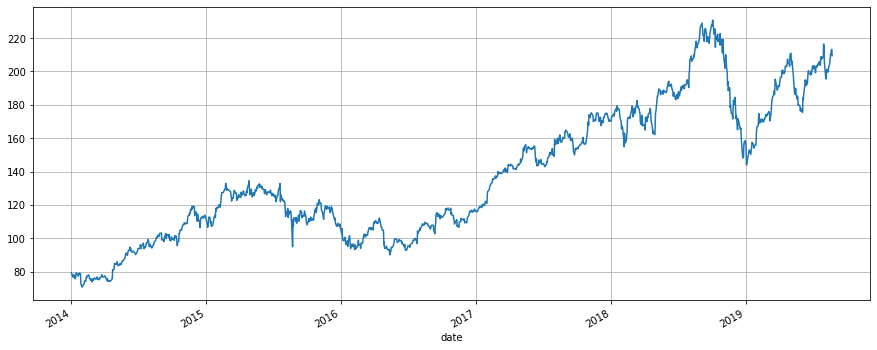

In [7]:
tech.loc[tech["name"] == "AAPL","open"].plot(figsize=(15,6),grid = True)

From the figure we can see that apple prices has been consistently increasing over the years with a sharp dip in 2019(President Donald Trump declared he would increased tariffs on chinese imports).

<AxesSubplot:ylabel='Global_Sales'>

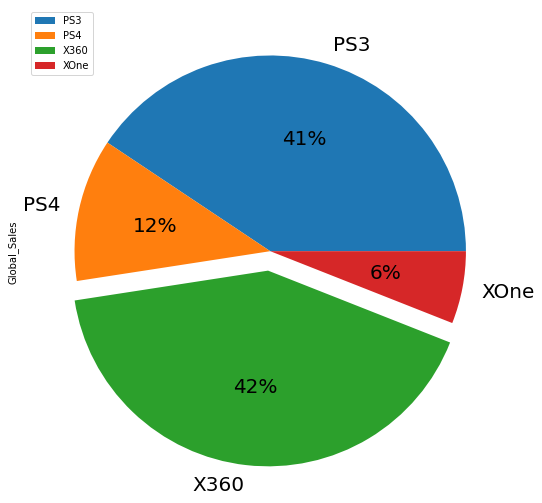

In [8]:
esport.groupby("Platform").Global_Sales.agg("sum").plot(kind="pie",figsize=(15,9),legend = True,autopct='%1.0f%%',explode=[0,0,0.1,0],textprops={'fontsize': 20})

It's clear from the pie that XBox 360 contributes the most to the global sales in the esports market.

In [9]:
sat = pd.read_csv('https://www.andybek.com/pandas-sat')
sat.head()

,School Name,Borough,Student Enrollment,Percent Tested,SAT Section,Score
0,A. Philip Randolph Campus High School,Manhattan,1354,74.00%,Math,459
1,A. Philip Randolph Campus High School,Manhattan,1354,74.00%,Reading,453
2,A. Philip Randolph Campus High School,Manhattan,1354,74.00%,Writing,447
3,Abraham Lincoln High School,Brooklyn,2341,54.90%,Math,441
4,Abraham Lincoln High School,Brooklyn,2341,54.90%,Reading,422


<AxesSubplot:ylabel='Frequency'>

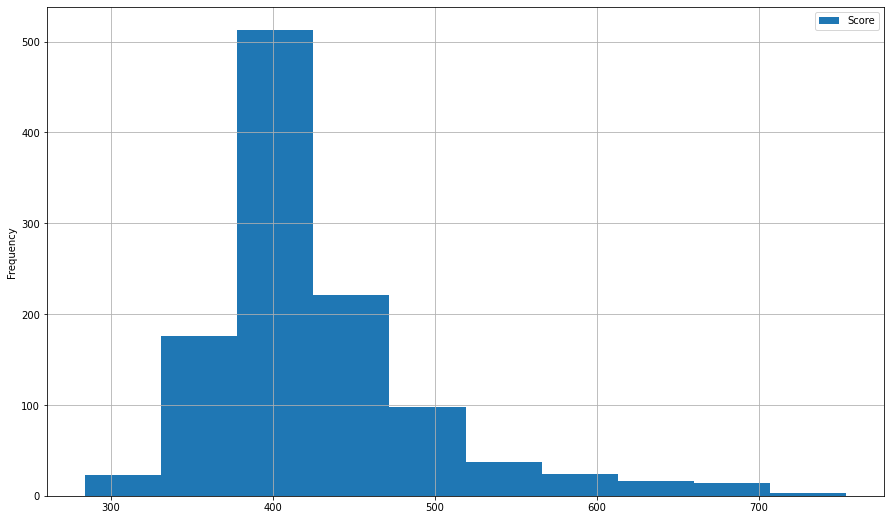

In [10]:
sat.loc[:,["Score"]].plot(kind= "hist",figsize=(15,9),grid=True)

From the histogram we can see that the highest scores are around the 400 mark.

In [11]:
reading = sat.loc[sat["SAT Section"]=="Reading",["Score"]].reset_index(drop=True)
writing = sat.loc[sat["SAT Section"]=="Writing",["Score"]].reset_index(drop=True)
math = sat.loc[sat["SAT Section"]=="Math",["Score"]].reset_index(drop=True)
scores = pd.concat([reading,writing,math],axis = 1,names=["reading","writing","math"])
scores.columns = ["reading","writing","math"]

<AxesSubplot:xlabel='reading', ylabel='writing'>

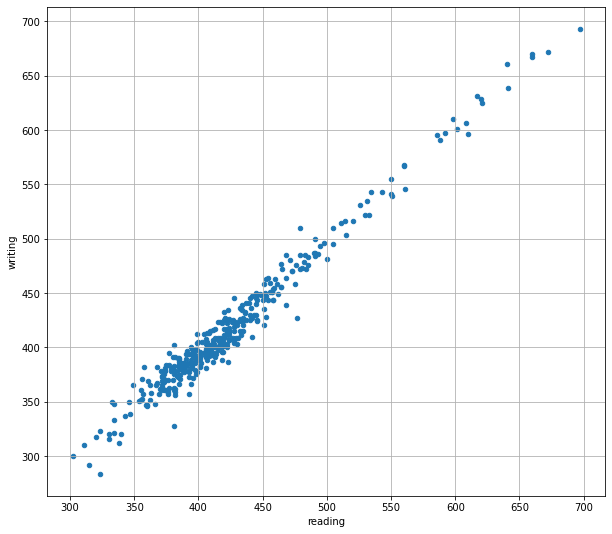

In [15]:
scores.plot(kind = 'scatter',x = 'reading',y = 'writing',figsize=(10,9),grid=True)

<AxesSubplot:xlabel='math', ylabel='writing'>

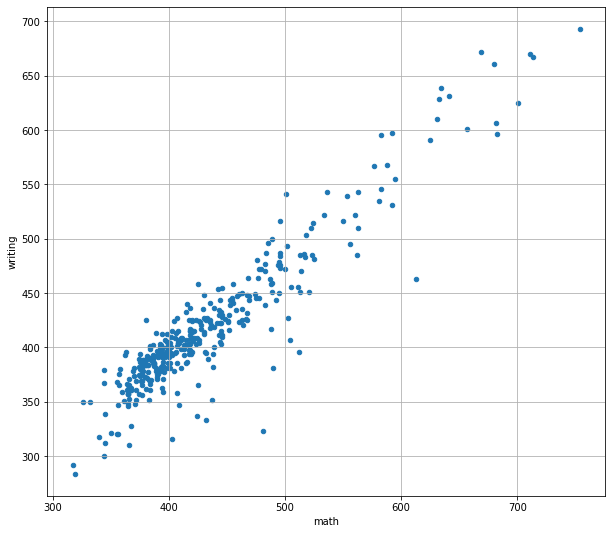

In [16]:
scores.plot(kind = 'scatter',x = 'math',y = 'writing',figsize=(10,9),grid=True)

From the above scatter photes we can see that the reading and writing are more co-related as compated to writing and math.